<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Package and Data Import</h2>
</div>

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

In [2]:
# Import dataset
df = pd.read_csv("https://raw.githubusercontent.com/shalaka98/Hackbio-cancer-internship-stage-3/b3d7372d308fddb9bbdc64c0e287abe98470010b/Data/Normalized_count_Data_final%20(1).csv")
df.head()

,Unnamed: 0,irregular_smoker_1,irregular_smoker_2,irregular_smoker_3,irregular_smoker_4,irregular_smoker_5,irregular_smoker_6,irregular_smoker_7,irregular_smoker_8,irregular_smoker_9,...,regular_smoker_11,regular_smoker_12,regular_smoker_13,regular_smoker_14,regular_smoker_15,regular_smoker_16,regular_smoker_17,regular_smoker_18,regular_smoker_19,regular_smoker_20
0,ENSG00000000003,3087,1624,3424,2370,4006,4586,1588,2436,9079,...,1686,2624,1369,4774,6616,4577,2261,667,4662,5315
1,ENSG00000000005,0,0,1,8,3,0,1,2,3,...,0,0,0,9,0,0,0,10,1,9
2,ENSG00000000419,2389,1588,1700,1290,1433,2629,816,1918,3519,...,1064,1964,703,974,2332,2329,1792,554,1414,3541
3,ENSG00000000457,1171,498,2170,713,820,1512,359,895,1630,...,1167,431,479,838,998,1257,246,716,543,1756
4,ENSG00000000460,282,114,457,496,258,311,193,780,1097,...,329,198,140,149,614,823,131,619,161,918


There are no missing values in the dataset

In [3]:
# Check shape of the datset and null values.
print(df.shape)
df.isnull().sum()

(33439, 41)


Unnamed: 0             0
irregular_smoker_1     0
irregular_smoker_2     0
irregular_smoker_3     0
irregular_smoker_4     0
irregular_smoker_5     0
irregular_smoker_6     0
irregular_smoker_7     0
irregular_smoker_8     0
irregular_smoker_9     0
irregular_smoker_10    0
irregular_smoker_11    0
irregular_smoker_12    0
irregular_smoker_13    0
irregular_smoker_14    0
irregular_smoker_15    0
irregular_smoker_16    0
irregular_smoker_17    0
irregular_smoker_18    0
irregular_smoker_19    0
irregular_smoker_20    0
regular_smoker_1       0
regular_smoker_2       0
regular_smoker_3       0
regular_smoker_4       0
regular_smoker_5       0
regular_smoker_6       0
regular_smoker_7       0
regular_smoker_8       0
regular_smoker_9       0
regular_smoker_10      0
regular_smoker_11      0
regular_smoker_12      0
regular_smoker_13      0
regular_smoker_14      0
regular_smoker_15      0
regular_smoker_16      0
regular_smoker_17      0
regular_smoker_18      0
regular_smoker_19      0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing</h2>
</div>

In [4]:
# Reshape dataframe
df_t = df.T
df_t.columns = df_t.iloc[0]
df_t['samples'] = df_t.index
df_t = df_t.iloc[1:].reset_index(drop=True)

In [5]:
# Remove the numbers from the sample labels
df_t['samples'] = df_t['samples'].str.replace(r'_\d+', '', regex=True)

# View changes
df_t.head()

Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288612,ENSG00000288632,ENSG00000288637,ENSG00000288638,ENSG00000288658,ENSG00000288663,ENSG00000288670,ENSG00000288674,ENSG00000288675,samples
0,3087,0,2389,1171,282,240,30708,1531,229,3812,...,39,0,0,0,172,19,367,8,51,irregular_smoker
1,1624,0,1588,498,114,743,3092,1185,967,2268,...,20,0,0,5,6,11,221,6,15,irregular_smoker
2,3424,1,1700,2170,457,263,1745,1879,8258,2702,...,169,2,4,104,8,64,764,28,23,irregular_smoker
3,2370,8,1290,713,496,847,1557,2118,438,1602,...,26,1,9,0,41,51,329,3,28,irregular_smoker
4,4006,3,1433,820,258,2105,8860,1440,1393,2119,...,143,0,1,2,18,42,280,15,17,irregular_smoker


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Feature Selection</h2>
</div>

In [6]:
# Feature selection
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=200)
df_selected = selector.fit_transform(df_t.drop(columns="samples"))

In [7]:
# Check the extent of feature reduction
print(f"feature space reduced by {((df_selected.shape[1] - df.shape[0]) / df.shape[0]) * 100:.2f}%")

feature space reduced by -27.55%


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Random Forest Classifier</h2>
</div>

### __Train/Test Split__

In [8]:
# Split dataset into training and test subsets
X = df_selected                                                                    # Get features
y = df_t["samples"]                                                                # Get labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)               # Get training and test subets 

In [11]:
# Check label distribution in the training and test data
print(f"Label distribution in training data: \n{y_train.value_counts()}\n\n")
print(f"Label distribution in test data: \n{y_test.value_counts()}")

Label distribution in training data: 
regular_smoker      17
irregular_smoker    15
Name: samples, dtype: int64


Label distribution in test data: 
irregular_smoker    5
regular_smoker      3
Name: samples, dtype: int64


### __Random Forrest Training__

In [13]:
# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

#### Hyperparameter Tuning using GridSearchCV

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, scoring="accuracy", cv=5, n_jobs=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_rf = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Evaluation</h2>
</div>

### __Accuracy Score and Classification Report__

In [16]:
# Predictions on test set
y_pred = best_rf.predict(X_test_scaled)

In [17]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8750


In [18]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                   precision    recall  f1-score   support

irregular_smoker       1.00      0.80      0.89         5
  regular_smoker       0.75      1.00      0.86         3

        accuracy                           0.88         8
       macro avg       0.88      0.90      0.87         8
    weighted avg       0.91      0.88      0.88         8



### __Confusion Matrix__

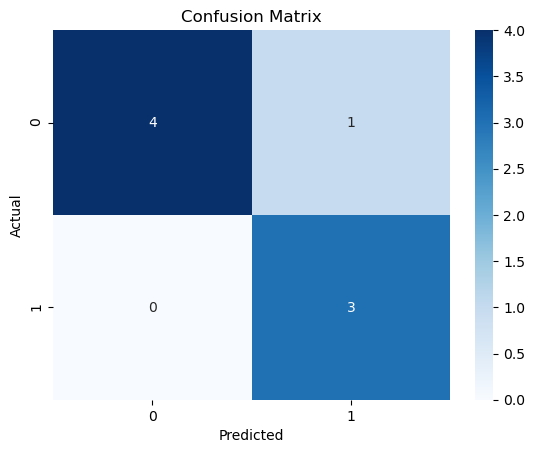

In [19]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### __Feature Importance__

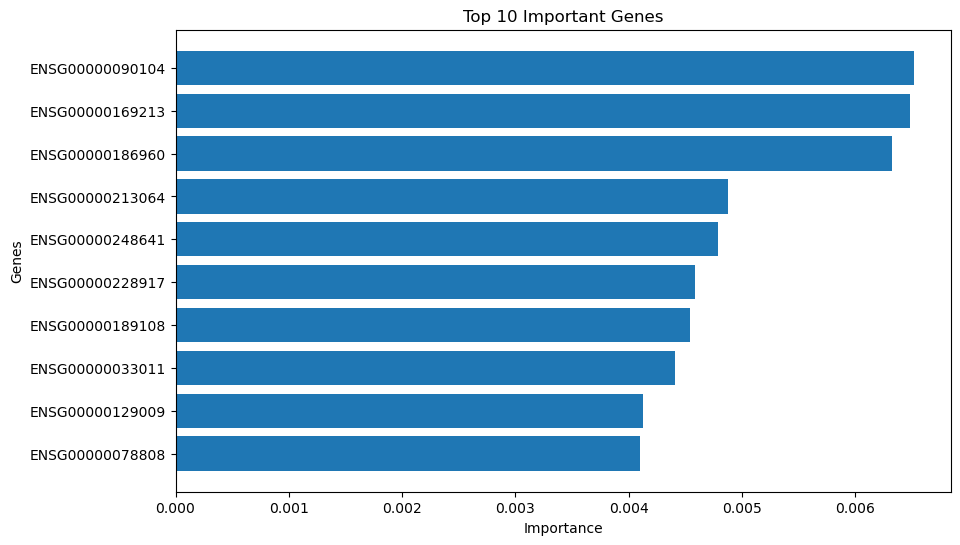

In [20]:
# Feature Importance
feature_importances = best_rf.feature_importances_
top_features_idx = np.argsort(feature_importances)[-10:]  # Top 10 most important features

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_idx)), feature_importances[top_features_idx], align='center')
plt.yticks(range(len(top_features_idx)), df_t.columns[top_features_idx])
plt.title('Top 10 Important Genes')
plt.xlabel('Importance')
plt.ylabel('Genes')
plt.show()

### __ROC Curve__

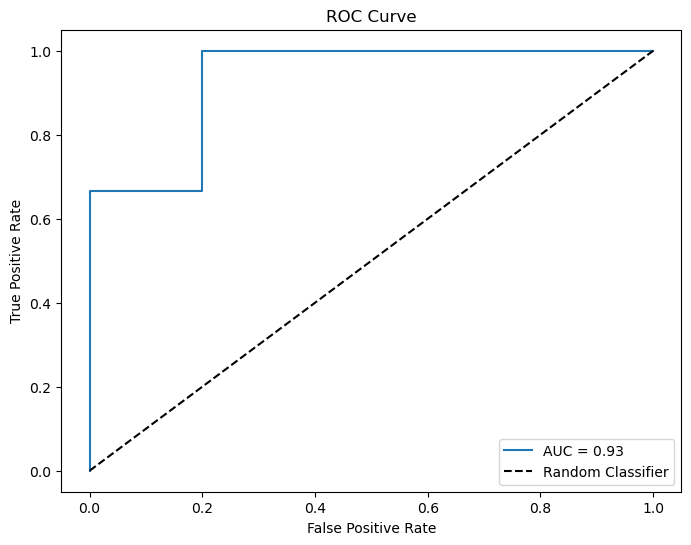

In [21]:
# ROC Curve and AUC
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.map({"regular_smoker": 1, "irregular_smoker": 0}), y_pred_proba)
roc_auc = roc_auc_score(y_test.map({"regular_smoker": 1, "irregular_smoker": 0}), y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### __Precision-Recall Curve__

Considering the class imbalance in the trainng and test data, a precision-recall curve might be more interpretable.

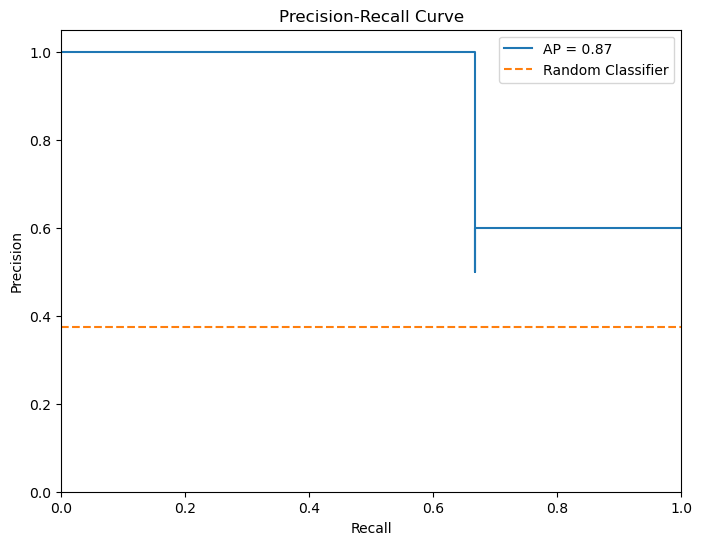

Average Precision Score: 0.87


In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Predict probabilities
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test.map({"regular_smoker": 1, "irregular_smoker": 0}), y_pred_proba)

# Calculate average precision score
avg_precision = average_precision_score(y_test.map({"regular_smoker": 1, "irregular_smoker": 0}), y_pred_proba)

# Create the plot
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label=f'AP = {avg_precision:.2f}')

# Add the random classifier line
no_skill = len(y_test[y_test == "regular_smoker"]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random Classifier')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.show()

# Print the average precision score
print(f'Average Precision Score: {avg_precision:.2f}')